RAneem mousa 202200389 random forest model with xai (shap , pdp ,lime ,Permutation importance )

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e577eab633066561c0e7a7111b7315f3a9210cb504663937c08346398a5797d0
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTENC
import shap
import lime
import lime.lime_tabular
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve





PREPROCING

In [ ]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809.98                 31.377862   
4       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  Monthly_Balance  \
0       80.41529543900253   High_spent_Small_value_payments       312.494089   
1      118.28022162236736    Low_spent_Large_value_payments       284.629162   
2         81.699521264648   Low_spent_Medium_value_payments       331.209863   
3       199.4580743910713    Low_spent_Small_value_payments       223.451310   
4      41.420153086217326  High_spent_Medium_value_payments       341.489231   

  Credit_Score  
0         Good  
1         Good  
2         Good  
3         Good  
4         Good

In [ ]:
test_df.head()

ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  Scientist      19114.12            1824.843333                  3   
1  Scientist      19114.12            1824.843333                  3   
2  Scientist      19114.12            1824.843333                  3   
3  Scientist      19114.12                    NaN                  3   
4    _______      34847.84            3037.986667                  2   

   Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                4              3           4   
1                4              3           4   
2                4              3           4   
3                4              3           4   
4                4              6           1   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    4   
4                                Credit-Builder Loan                    3   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                2022.0   
1                      9                13.27                   4.0   
2                      4                12.27                   4.0   
3                      5                11.27                   4.0   
4                      1                 5.42                   5.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0       Good           809.98                 35.030402   
1       Good           809.98                 33.053114   
2       Good           809.98                 33.811894   
3       Good           809.98                 32.430559   
4       Good           605.03                 25.926822   

       Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0   22 Years and 9 Months                    No            49.574949   
1  22 Years and 10 Months                    No            49.574949   
2                     NaN                    No            49.574949   
3   23 Years and 0 Months                    No            49.574949   
4   27 Years and 3 Months                    No            18.816215   

  Amount_invested_monthly                 Payment_Behaviour  Monthly_Balance  
0      236.64268203272135    Low_spent_Small_value_payments       186.266702  
1      21.465380264657146  High_spent_Medium_value_payments       361.444004  
2      148.23393788500925   Low_spent_Medium_value_payments       264.675446  
3       39.08251089460281  High_spent_Medium_value_payments       343.826873  
4      39.684018417945296   High_spent_Large_value_payments       485.298434

In [ ]:
df.shape,
test_df.shape

(3427, 27)

In [ ]:
df.shape,df


((3380, 28),
           ID Customer_ID     Month           Name   Age          SSN  \
 0     0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
 1     0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
 2     0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
 3     0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
 4     0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
 ...      ...         ...       ...            ...   ...          ...   
 3375  0x29c5  CUS_0xad9d    August  Valentina Zaf    23  771-56-8439   
 3376  0x29ca  CUS_0x9776   January      Carolinex    40  703-80-5465   
 3377  0x29cb  CUS_0x9776  February      Carolinex    40  703-80-5465   
 3378  0x29cc  CUS_0x9776     March      Carolinex    40  703-80-5465   
 3379  0x29cd  CUS_0x9776     April      Carolinex   40_  703-80-5465   
 
      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
 0     Scientist      19114.12   

In [ ]:
test_df.shape,test_df

((3427, 27),
           ID Customer_ID      Month             Name  Age          SSN  \
 0     0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
 1     0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
 2     0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
 3     0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
 4     0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   
 ...      ...         ...        ...              ...  ...          ...   
 3422  0x3e20  CUS_0x1d15   November              NaN   36  721-59-8577   
 3423  0x3e21  CUS_0x1d15   December       Dominiquey   36  721-59-8577   
 3424  0x3e2a  CUS_0x6f31  September            Ryand   43  970-95-8076   
 3425  0x3e2b  CUS_0x6f31    October            Ryand   43  970-95-8076   
 3426  0x3e2c  CUS_0x6f31   November            Ryand  43_  970-95-8076   
 
         Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
 0    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3380 entries, 0 to 3379
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3380 non-null   object 
 1   Customer_ID               3380 non-null   object 
 2   Month                     3380 non-null   object 
 3   Name                      3051 non-null   object 
 4   Age                       3380 non-null   object 
 5   SSN                       3380 non-null   object 
 6   Occupation                3380 non-null   object 
 7   Annual_Income             3380 non-null   object 
 8   Monthly_Inhand_Salary     2852 non-null   float64
 9   Num_Bank_Accounts         3380 non-null   int64  
 10  Num_Credit_Card           3380 non-null   int64  
 11  Interest_Rate             3380 non-null   int64  
 12  Num_of_Loan               3380 non-null   object 
 13  Type_of_Loan              2940 non-null   object 
 14  Delay_fr

In [ ]:
df.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count            2852.000000        3380.000000      3380.000000   
mean             4297.073879          19.075148        22.425740   
std              3298.508577         132.606895       133.527038   
min               468.770000           0.000000         1.000000   
25%              1654.615000           3.000000         4.000000   
50%              3068.915000           6.000000         5.000000   
75%              5988.705000           8.000000         7.000000   
max             14710.533333        1777.000000      1486.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count    3380.000000          3380.000000           3306.000000   
mean       79.850296            21.784024             19.923775   
std       487.927461            15.103709            151.092122   
min         1.000000            -5.000000              0.000000   
25%         7.000000            11.000000              2.000000   
50%        13.000000            18.000000              5.000000   
75%        20.000000            29.000000              9.000000   
max      5721.000000            67.000000           2539.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  Monthly_Balance  
count               3380.000000          3379.000000      3333.000000  
mean                  32.334490          1409.337595       407.805305  
std                    5.147149          8124.490638       222.268887  
min                   21.495862             0.000000         0.688299  
25%                   28.106015            28.071965       268.804772  
50%                   32.405018            69.685459       340.463758  
75%                   36.590704           156.003312       474.613699  
max                   47.969560         82204.000000      1534.963533

In [ ]:
df.isnull().sum()

ID                            0
Customer_ID                   0
Month                         0
Name                        329
Age                           0
SSN                           0
Occupation                    0
Annual_Income                 0
Monthly_Inhand_Salary       528
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                   0
Type_of_Loan                440
Delay_from_due_date           0
Num_of_Delayed_Payment      223
Changed_Credit_Limit          0
Num_Credit_Inquiries         74
Credit_Mix                    0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age          308
Payment_of_Min_Amount         1
Total_EMI_per_month           1
Amount_invested_monthly     141
Payment_Behaviour             1
Monthly_Balance              47
Credit_Score                  1
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

ID                          3380
Customer_ID                  423
Month                          8
Name                         420
Age                          159
SSN                          424
Occupation                    16
Annual_Income                637
Monthly_Inhand_Salary        444
Num_Bank_Accounts             56
Num_Credit_Card               81
Interest_Rate                115
Num_of_Loan                   36
Type_of_Loan                 312
Delay_from_due_date           71
Num_of_Delayed_Payment        79
Changed_Credit_Limit         833
Num_Credit_Inquiries          57
Credit_Mix                     4
Outstanding_Debt             460
Credit_Utilization_Ratio    3380
Credit_History_Age           403
Payment_of_Min_Amount          3
Total_EMI_per_month          505
Amount_invested_monthly     3081
Payment_Behaviour              7
Monthly_Balance             3333
Credit_Score                   3
dtype: int64

In [ ]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

EDA

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [ ]:
print(df['Credit_Score'].value_counts())


Credit_Score
Standard    946
Poor        537
Good        279
Name: count, dtype: int64


# Visualizing class distribution


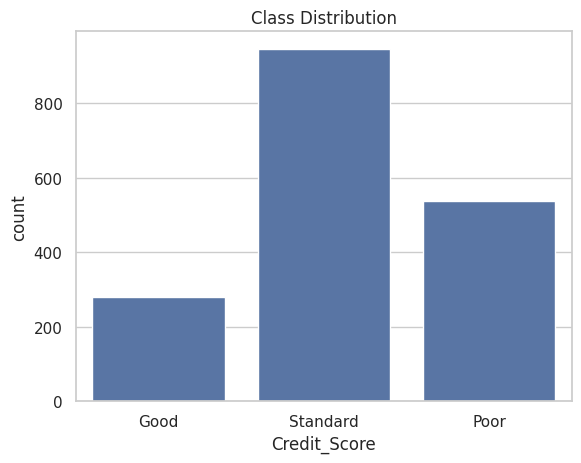

In [ ]:
sns.countplot(data=df, x='Credit_Score')
plt.title("Class Distribution")
plt.show()

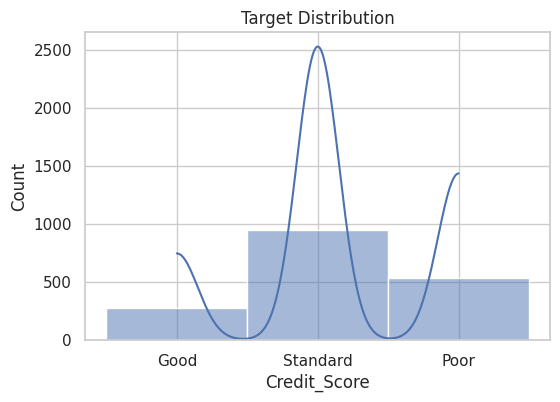

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["Credit_Score"], kde=True)
plt.title("Target Distribution")
plt.show()

Correlation heatmap

<Axes: >

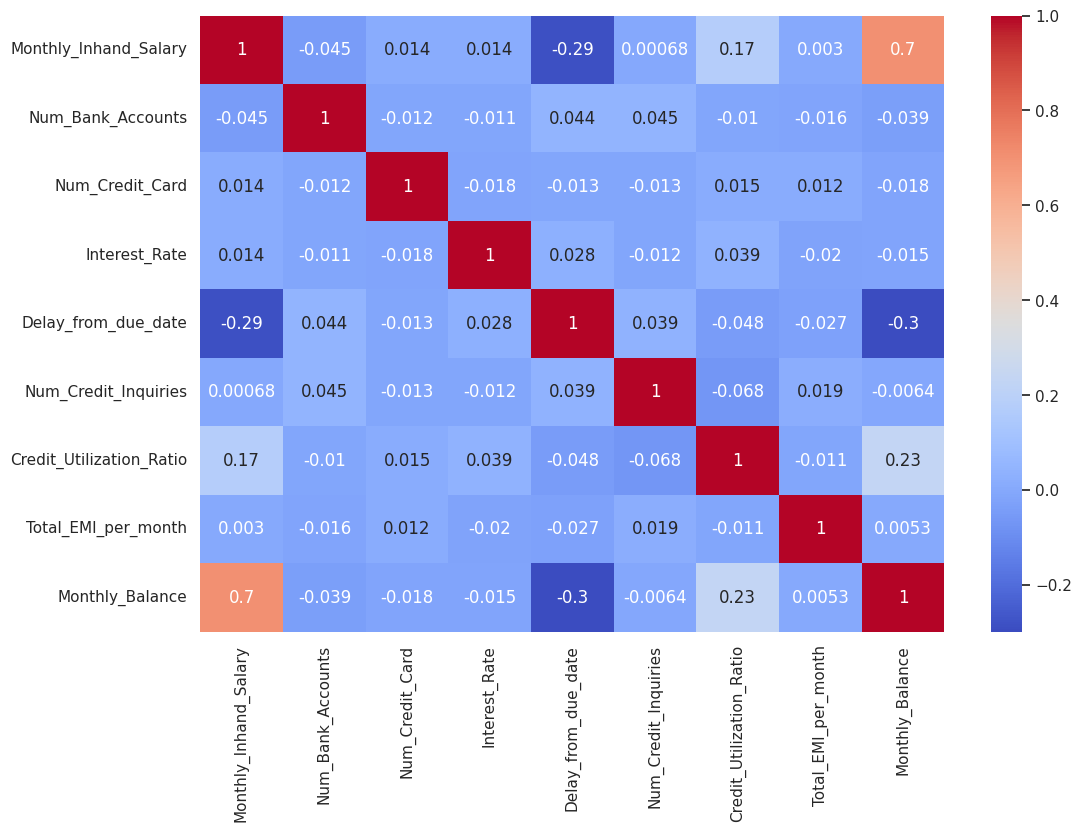

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
print(df.columns.tolist())

['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


Pairplot for feature relationships


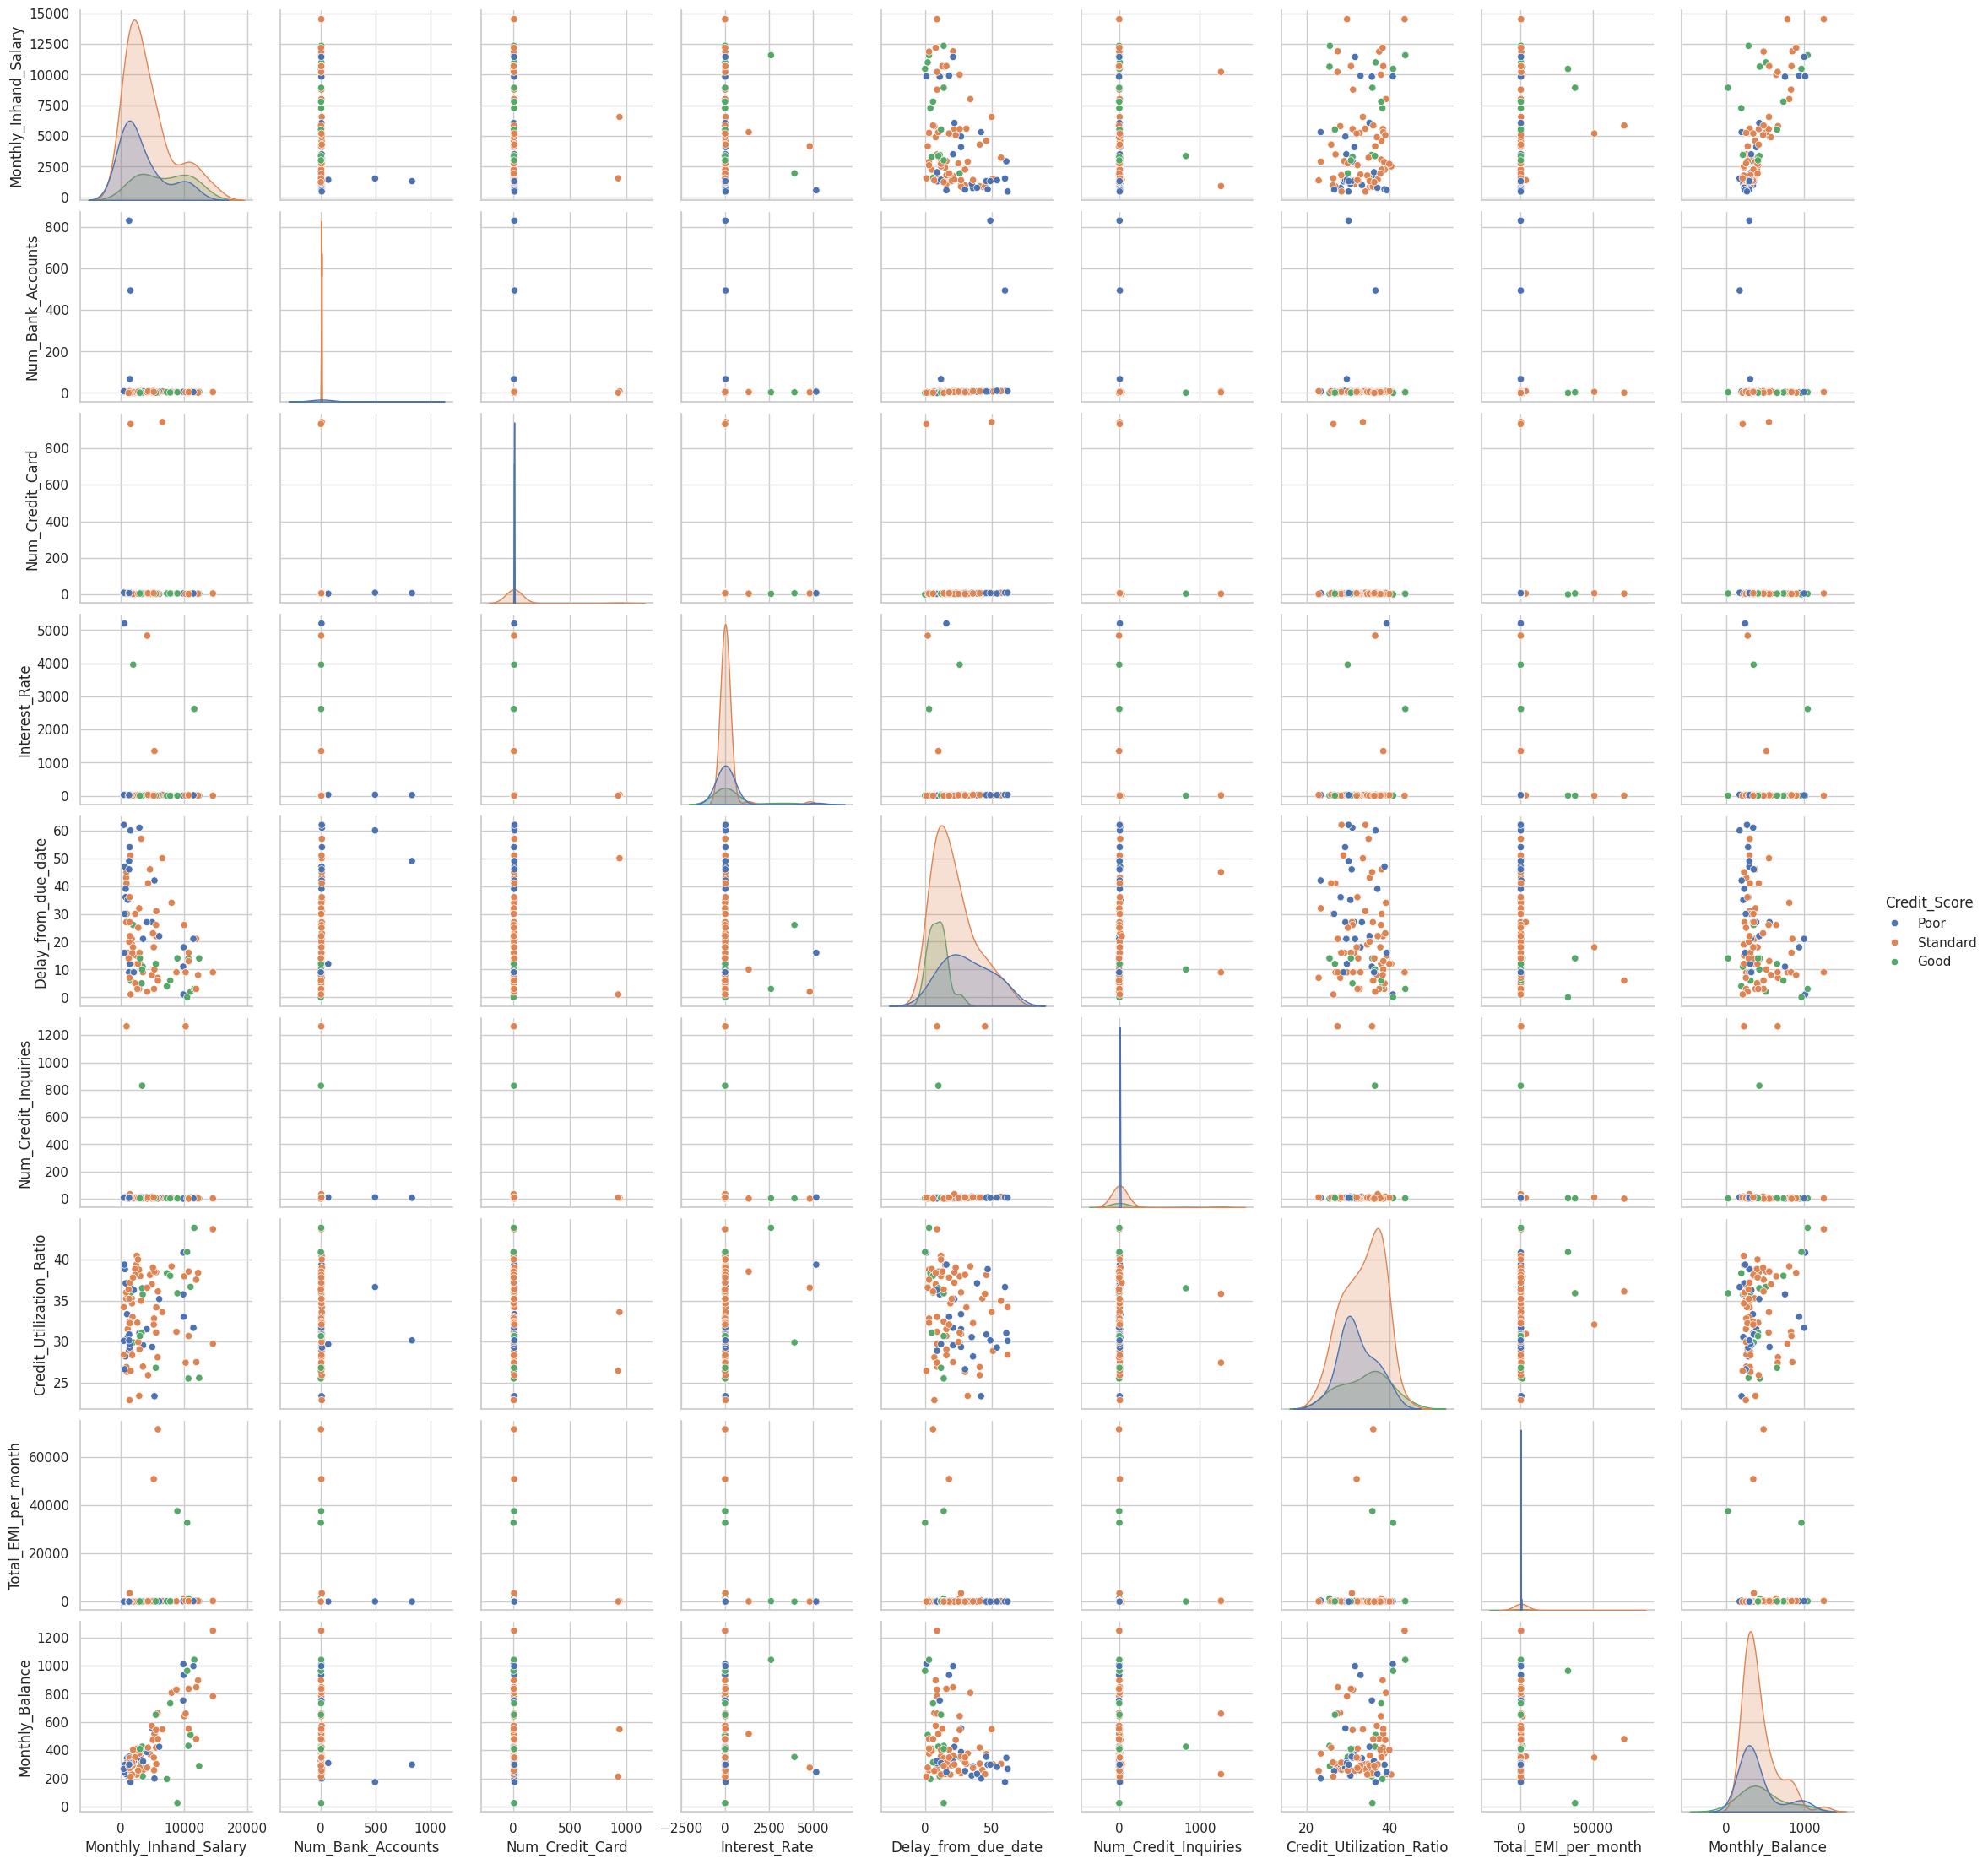

In [ ]:
sns.pairplot(df.sample(100), hue="Credit_Score")
plt.show()


Pairplot

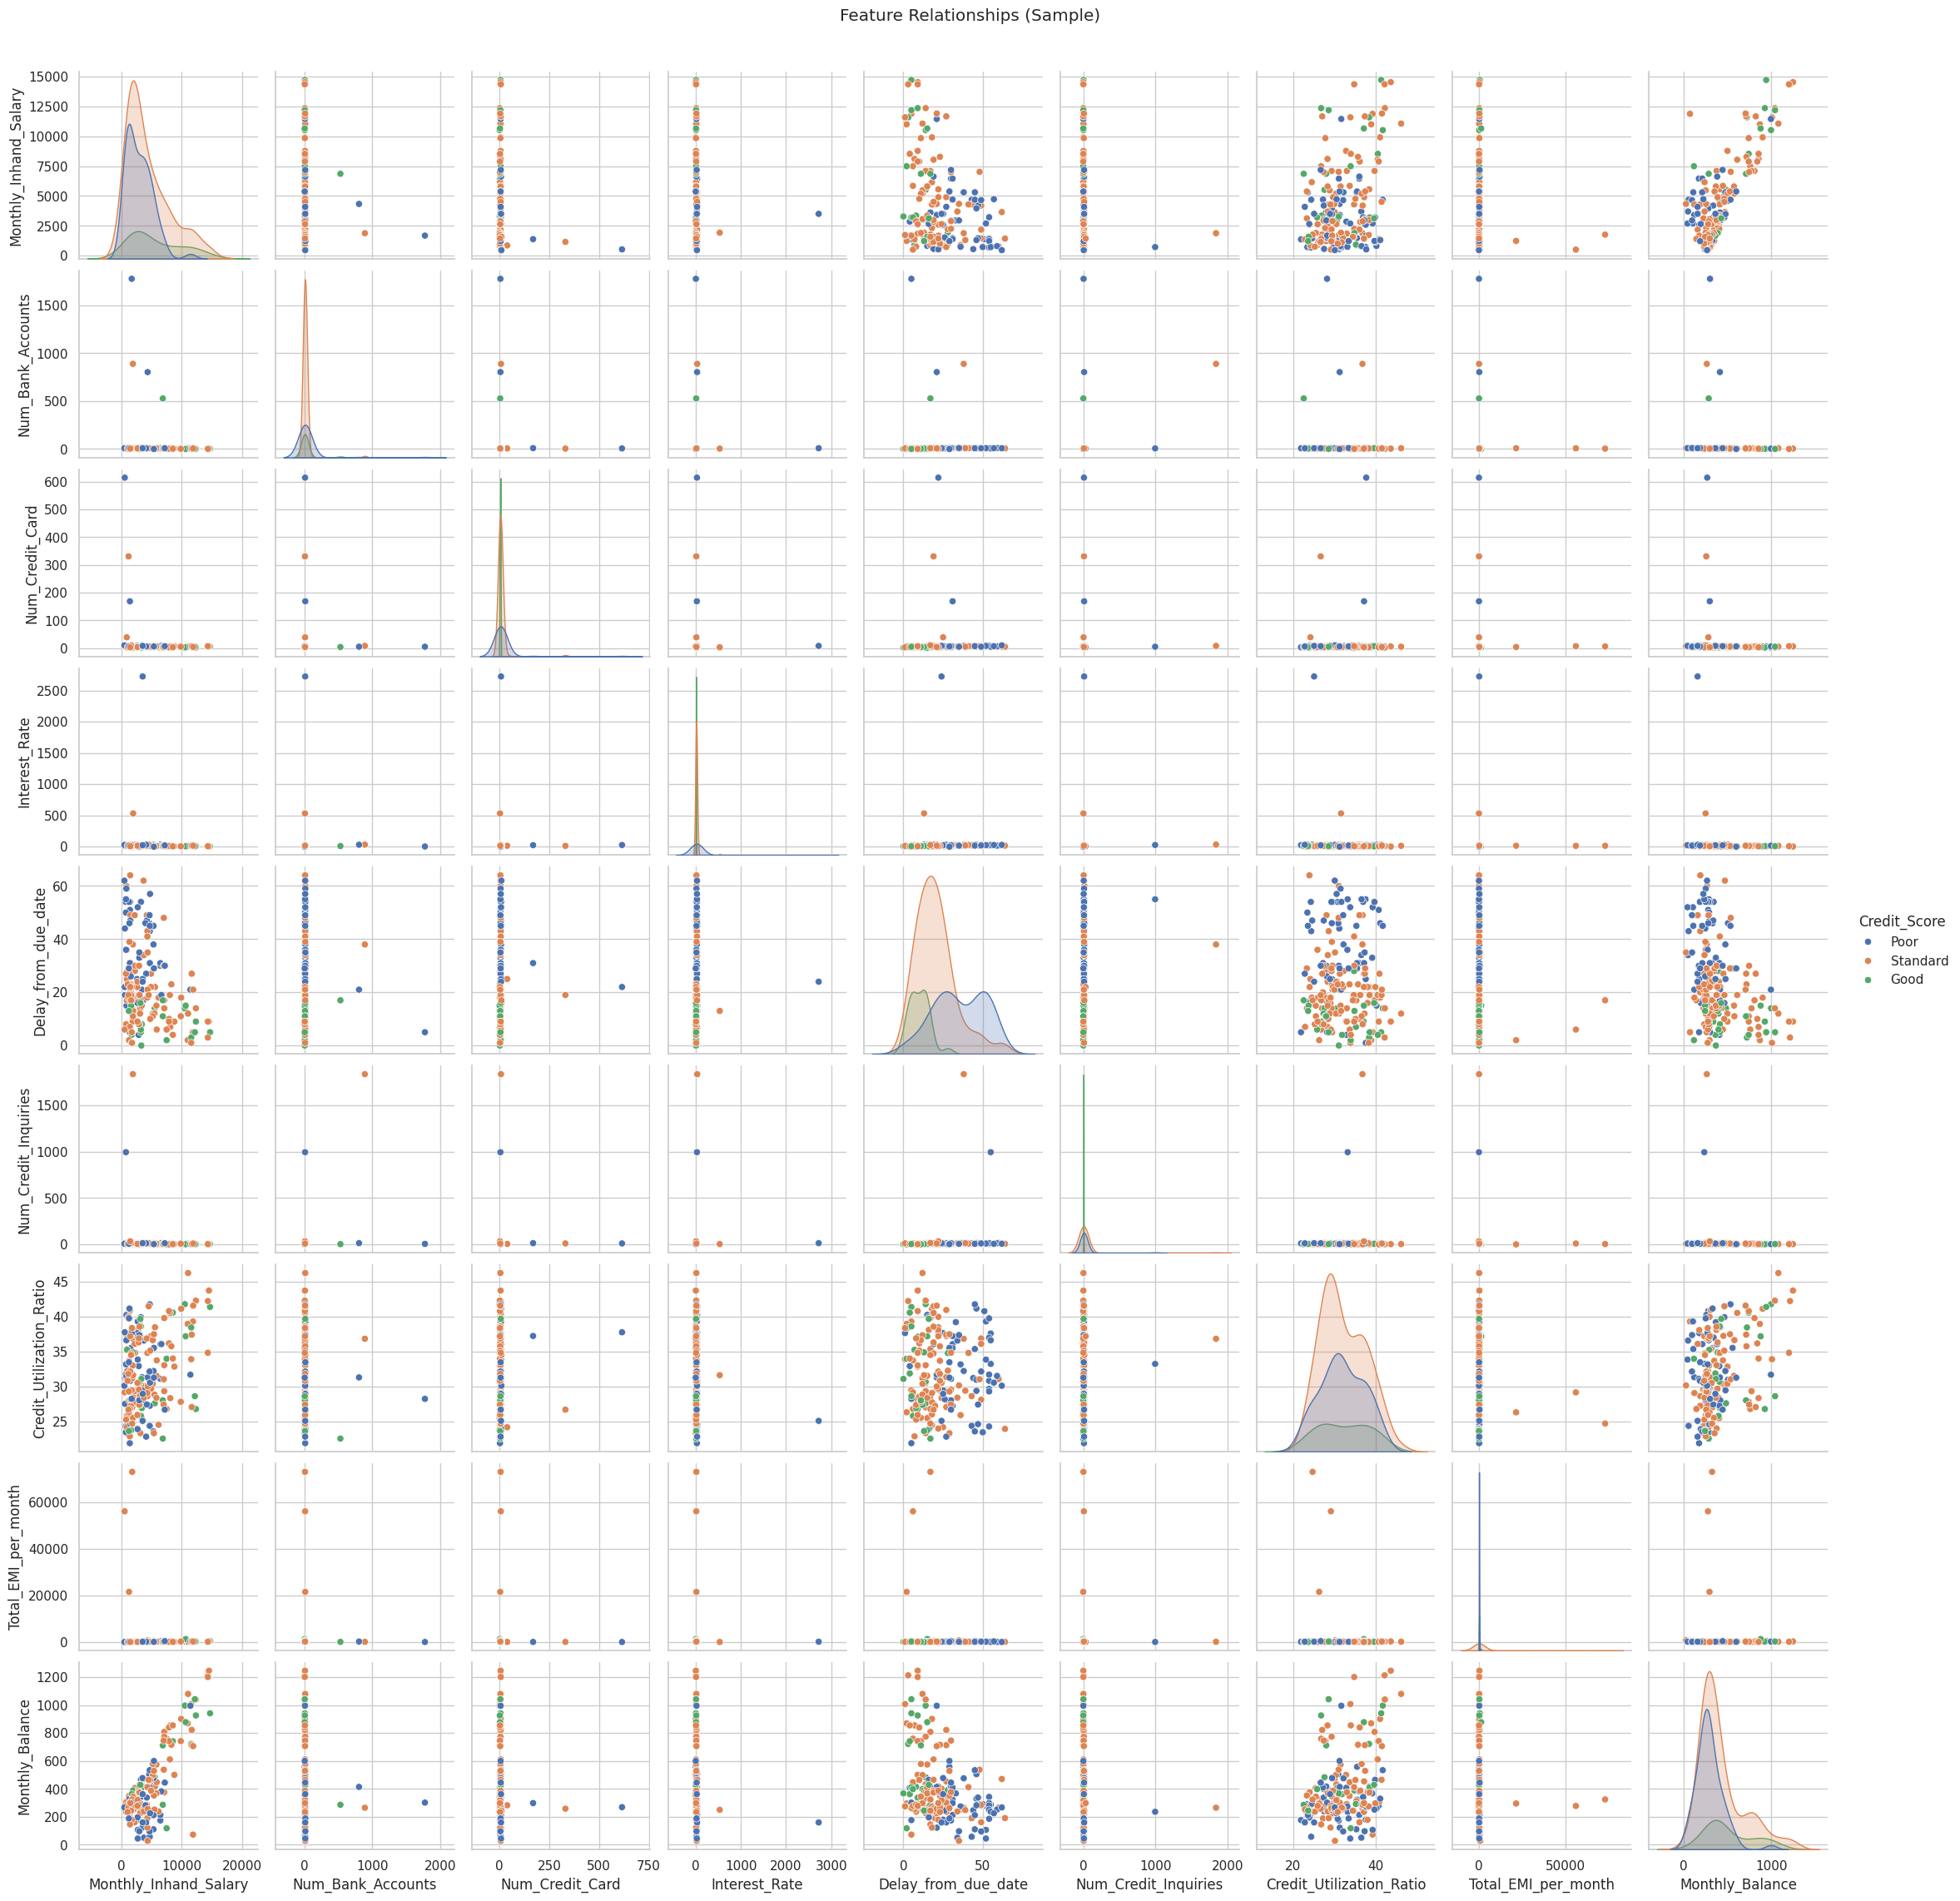

In [ ]:
sns.pairplot(df.sample(n=min(200, len(df))), hue="Credit_Score")
plt.suptitle("Feature Relationships (Sample)", y=1.02)
plt.show()

# Encode categorical features if any


In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [ ]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']


Scale StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



 Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

 confusion matrix and classification report

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 39   0  23]
 [  0  83  21]
 [  9  15 163]]
 Report:
               precision    recall  f1-score   support

           0       0.81      0.63      0.71        62
           1       0.85      0.80      0.82       104
           2       0.79      0.87      0.83       187

    accuracy                           0.81       353
   macro avg       0.82      0.77      0.79       353
weighted avg       0.81      0.81      0.80       353




 ROC AUC score


In [ ]:
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC_AUC Score:", roc_auc)


ROC_AUC Score: 0.9129600046462002


 ROC Curve

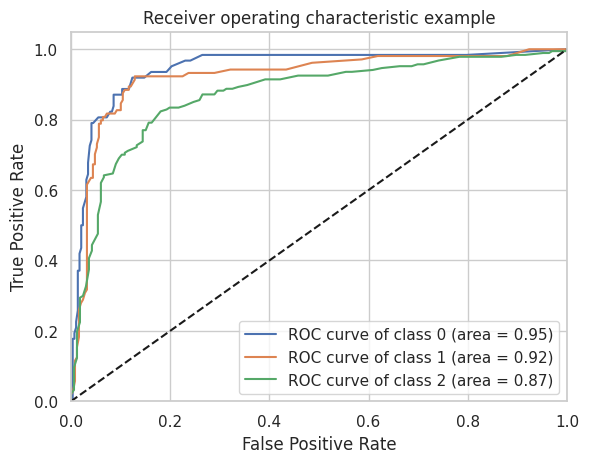

In [ ]:
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_proba[:, i])

# ROC curves for each class
plt.figure()
for i in range(y_test_binarized.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Permutation importance plot


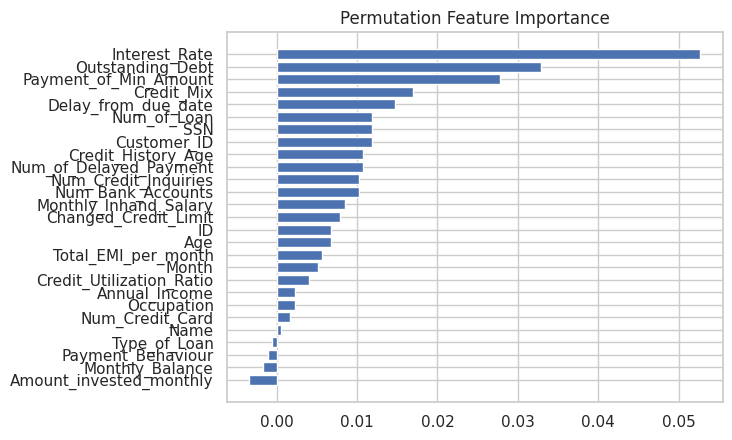

In [ ]:
result = permutation_importance(model, X_test, y_test)
importances = result.importances_mean
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), np.array(X.columns)[indices])
plt.title("Permutation Feature Importance")
plt.show()

Partial Dependence Plots fortop 3 features


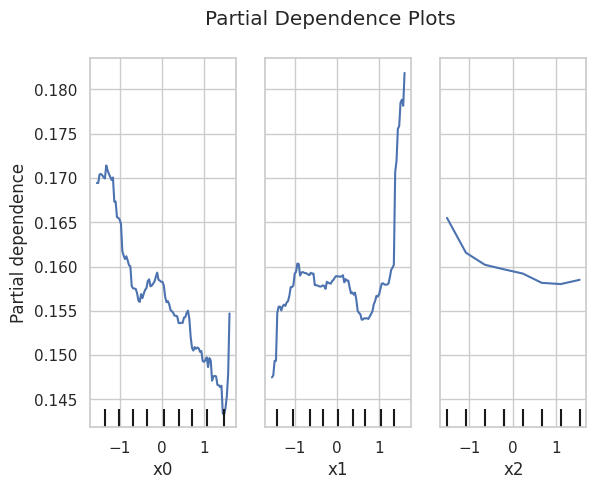

In [ ]:
PartialDependenceDisplay.from_estimator(model, X_test, [0, 1, 2], target=0)

plt.suptitle("Partial Dependence Plots")
plt.show()

 SHAP


In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP plot


<Figure size 640x480 with 0 Axes>

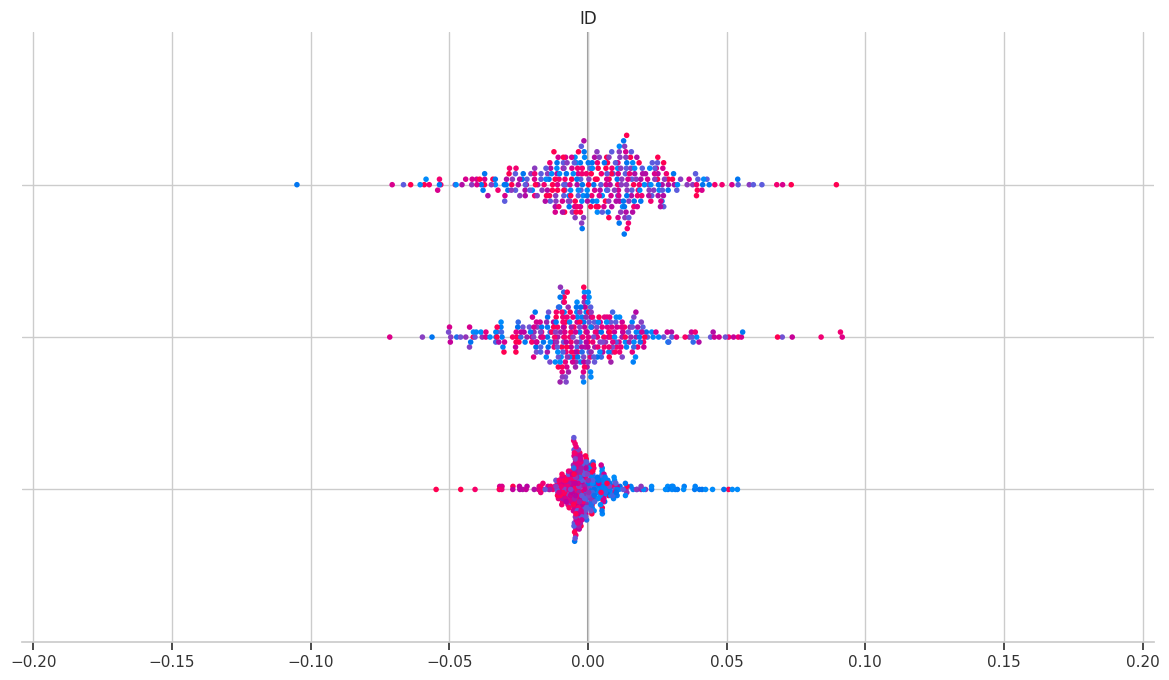

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

SHAP waterfall plot for the first prediction

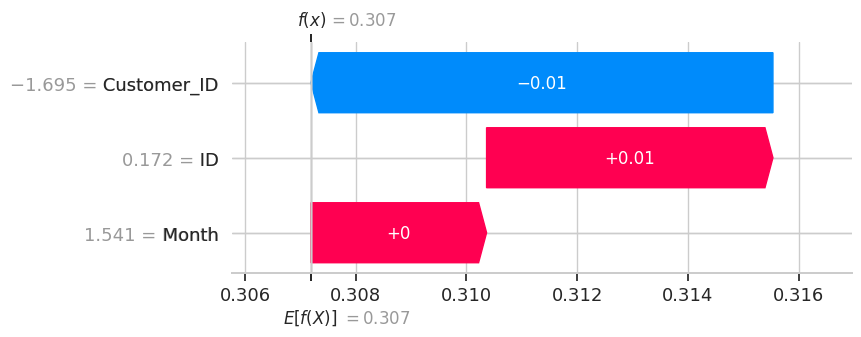

In [ ]:
shap.plots.waterfall(shap.Explanation(values=shap_values[1][0],
                                      base_values=explainer.expected_value[1],
                                      data=X_test[0],
                                      feature_names=X.columns))



# LIME


In [ ]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns.tolist(),
                                                       class_names=['Poor', 'Fair', 'Good']
, discretize_continuous=True)
explanation = lime_explainer.explain_instance(X_test[0], model.predict_proba, num_features=5)
explanation.show_in_notebook(show_table=True)


REFRANCE
https://www.mdpi.com/2227-9091/9/3/50?utm_source=chatgpt.com